## This is a quick walkthrough of the Laplace approximationa algorithm in inferrence of a posterior distribution of dynamic topic modeling
### [original paper link](http://repository.cmu.edu/cgi/viewcontent.cgi?article=2036&context=compsci)

### Data generation process:
For each topic k at time t=0 <br>
$\beta_{k,0} \sim N(0,I)$ <br>
<br>
For each topic k at time t $>$ 0 <br>
$\beta_{k,t} \sim N(\beta_{k,t-1},\sigma^2 I)$ <br>
<br>
For each document d at time t <br>
$\theta_{t,d} \sim Dirichlet(\alpha)$ <br>
<br>
For each word n at document d at time t<br>
$z_{t,d}^{n} \sim Discrete(\theta_{t,d})$<br>
$w_{t,d}^{n} \sim Discrete(\pi(\beta_{z_{t,d}^{n},t}))$<br>

### We first simulate some fake data per the above data generation process
### For simplicity, we assume each document is of the same length D

In [1]:
import numpy as np
from scipy import misc
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
from simulate import *

In [2]:
from variational_inference import *

In [3]:
np.random.seed(seed=123)

### some hyper parameters

In [4]:
K = 5
V = 500
N = 40
D = 30
T = 10
sigma = 0.1
alpha_0 = np.array([1]*K)

In [5]:
document_sim, real_beta = simulate_data(K=K, V=V, N=N, D=D, T=T, sigma = sigma, alpha_0 = alpha_0)
print("glance of simulated data at t=0")
document_sim[0][:4]


topics= 5, vocab = 500, D = 30, N = 40, T =10
glance of simulated data at t=0


array([[181,   1,  95,  58, 306,  80, 496, 222,  73, 469, 282, 166,  36,
         55, 331, 132,  92, 126, 399, 141,  20,  57, 283, 270, 256,  92,
        148,  54, 314,   8, 258, 240, 303, 124, 335, 103, 259, 105, 210,
        304],
       [247,  52,  18, 375, 362, 426, 382, 439, 371,  57, 364,  91, 343,
        271, 349, 363, 213, 430,  68, 249, 391, 371, 271, 491, 259, 470,
        324, 420, 440, 273, 183,  16,  54, 475, 368, 331, 178, 454, 231,
        103],
       [389, 334,  17, 314, 448,   4, 116,  65, 409, 259, 277,  91,  75,
        470, 117, 260,  26, 211, 141, 231, 427, 228, 270, 141, 305, 414,
        120, 470, 269, 287, 175, 478, 231, 495,  29, 350, 438,  23,  87,
        495],
       [209,  27,  82, 395, 328,  98,  68,  78, 214, 478, 298, 161, 428,
        435,  54, 252, 247, 309, 312, 166, 246, 481, 344, 304, 119, 353,
        217, 202,  11, 404, 493,  20, 352, 424, 253, 419, 326, 235, 386,
        333]])

In [6]:
document_sim.shape

(10, 30, 40)

In [6]:
type(document_sim[0][0][0])

numpy.float64

In [14]:
real_beta[0].shape

(5, 500)

In [6]:
VI =  variational_inference(T = T, D= D, K=K, N=N,V = V, iters=200, document = document_sim, sample_size = 1000)

In [7]:
VI.train()

update takes 79 sec
ELBO calculation takes 0 sec
epoch = 0, elbo = -65597
phi[t=0][d=0][n=0]: [ 0.16755613  0.23459602  0.15884207  0.22727045  0.21173533]
update takes 77 sec
ELBO calculation takes 0 sec
epoch = 1, elbo = -65594
phi[t=0][d=0][n=0]: [ 0.16974546  0.23248203  0.1613636   0.22563883  0.21077008]
update takes 77 sec
ELBO calculation takes 0 sec
epoch = 2, elbo = -65596
phi[t=0][d=0][n=0]: [ 0.17132403  0.23074714  0.16361245  0.22489001  0.20942638]
epoch = 3, elbo = -65581
phi[t=0][d=0][n=0]: [ 0.17280428  0.22908227  0.16543955  0.22366633  0.20900757]


KeyboardInterrupt: 

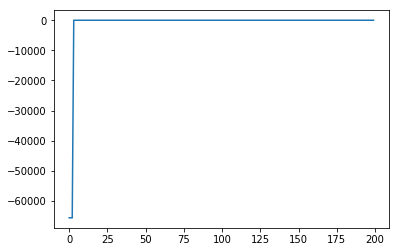

In [18]:
plt.plot(range(VI.iters),VI.ELBO_iter)
plt.show()

In [19]:
VI.mu_beta_t[0][0]

array([-0.29321627, -0.12749   ,  0.45210905,  0.89524806, -0.12522719,
       -0.36910768, -0.35650309,  0.06015394,  0.15585133, -0.0601214 ,
       -0.34875604,  0.00968762, -0.16273831, -0.40923823, -0.11954274,
       -0.26131289,  0.31248507, -0.42055271,  0.49128626, -0.57042216,
       -0.1372837 , -0.39164428,  0.3165389 ,  0.00140656,  0.25360884,
       -0.35672064,  0.34954823, -0.05380233, -0.28215706, -0.06784658,
        0.21332122,  0.0060246 , -0.29575984, -0.46677222, -0.37736683,
        0.84277454,  0.84506644,  0.62001576,  0.01135701,  0.21672454])

In [21]:
VI.mu_beta_t[1][0]

array([-0.29175428, -0.1271418 ,  0.45830929,  0.90632615, -0.12390987,
       -0.37197696, -0.3622443 ,  0.05881977,  0.15651099, -0.06584133,
       -0.3525124 ,  0.01269681, -0.16358441, -0.41244317, -0.11526824,
       -0.2672998 ,  0.31431326, -0.42541229,  0.49510344, -0.57586259,
       -0.1378049 , -0.39573832,  0.32068482,  0.00142207,  0.25632797,
       -0.35439888,  0.34295664, -0.05647751, -0.28478146, -0.06480302,
        0.21891803,  0.00380675, -0.2987307 , -0.4682813 , -0.3793331 ,
        0.85168074,  0.8474418 ,  0.62322852,  0.0055311 ,  0.22102955])

In [20]:
VI.mu_beta_t[0][1]

array([-0.29401347, -0.1347927 ,  0.42397632,  0.94709113, -0.11125612,
       -0.38234314, -0.37161342,  0.0700861 ,  0.16732529, -0.07945175,
       -0.36608403,  0.02435243, -0.1799848 , -0.43662101, -0.13615017,
       -0.27979216,  0.30833201, -0.43951006,  0.48260859, -0.58589291,
       -0.16599693, -0.40056747,  0.26512913,  0.03120364,  0.26467144,
       -0.36722056,  0.36780514, -0.05429989, -0.30067906, -0.05807905,
        0.20779411, -0.00791177, -0.30817168, -0.47468589, -0.37566135,
        0.90439204,  0.83716329,  0.66945278,  0.00909627,  0.33111097])

### ELBO for each word
### $ \mathbb{E}_{q(\theta)q(z)q(\beta)}[log p(z_{t,d}^{n}| \theta_{t,d}) + log p(w_{t,d}^{n} |z_{t,d}^{n}, \beta_{t}) ] $
### $ = \mathbb{E}_{q(\theta)q(z)} log \prod {\theta_{t,d}^k} ^ {\mathbb{1}(z_{t,d}^{n}=k)} + \mathbb{E}_{q(z)q(\beta)} log [\pi (\beta_{t,z})_{w})]$
### $ = \mathbb{E}_{q(\theta)q(z)} \Sigma_{k=1}^{K} {\mathbb{1}(z_{t,d}^{n}=k)}{log(\theta_{t,d}^k)}+ \mathbb{E}_{q(z)q(\beta)} log \frac{exp(\beta_{t,z}^{w})}{\Sigma_{v=1}^{V}exp(\beta_{t,z}^{v})}$
### $ = \Sigma_{k=1}^{K} \mathbb{E}_{q(z)}{\mathbb{1}(z_{t,d}^{n}=k)}\mathbb{E}_{q(\theta)}{log(\theta_{t,d}^k)}+ \mathbb{E}_{q(z)q(\beta)} \beta_{t,z}^{w} - \mathbb{E}_{q(z)q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,z}^{v})}$
###  $ = \Sigma_{k=1}^{K} \phi_{t,d}^{n,k}[\psi(\alpha_{t,d}^{k})-\psi(\Sigma_{j=1}^{K} \alpha_{t,d}^{j})] + \Sigma_{k=1}^{K} \phi_{t,d}^{n,k} \mathbb{E}_{q(\beta)}\beta_{t,k}^{w} - \Sigma_{k=1}^{K} \phi_{t,d}^{n,k} \mathbb{E}_{q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,k}^{v})}$
### $= \Sigma_{k=1}^{K} \phi_{t,d}^{n,k}[\psi(\alpha_{t,d}^{k})-\psi(\Sigma_{j=1}^{K} \alpha_{t,d}^{j})+\hat{\beta}_{t,k}^{w} - \mathbb{E}_{q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,k}^{v})} ]$
### $ = <\phi_{t,d}^{n}, \nu>$ where $\nu$ is a k-dim vector of the above [ . ]



In [21]:
sigma = 0.1
mu_beta_t = np.zeros((T,K,V))


In [25]:
np.dot(mu_beta_t[1][0],np.zeros(V))

0.0

In [9]:
phi = np.empty((10,20,5))

In [10]:
phi

array([[[ -1.72723371e-077,  -1.72723371e-077,   8.12775090e-043,
           1.61410559e+132,   6.01347002e-154],
        [  9.16281386e-072,   5.77686537e+175,   9.89803615e+164,
           1.42137836e-076,   1.23769224e+224],
        [  1.24679207e+243,   9.89803615e+164,   9.16281387e-072,
           5.92942534e-114,   9.45956265e-076],
        [  1.61410559e+132,   9.16281387e-072,   1.42137876e-076,
           1.11416848e+218,   1.61410559e+132],
        [  9.89803615e+164,   1.92078601e+136,   9.02193423e+217,
           9.45956265e-076,   1.42137876e-076],
        [  2.95164082e-075,   4.11017660e+223,   6.19941898e-071,
           6.01347173e-154,   9.16281386e-072],
        [  6.01347173e-154,   6.01347002e-154,   1.61410559e+132,
           9.16281387e-072,   2.95147897e-075],
        [  3.06370797e-057,   9.89803615e+164,   1.42137836e-076,
           1.23769224e+224,   9.45956265e-076],
        [  1.61410559e+132,   2.11396031e+257,   1.69724950e+137,
           9.02193423e

In [31]:
B_t_k = np.zeros(6)
doc_t_d = np.array([2,3,0,5,5,2,1,1,1])
one_hot = np.array([np.eye(6)[idx] for idx in doc_t_d])
one_hot

array([[ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

In [32]:
B_t_k += np.dot(np.array([10,20,30,40,50,60,70,80,90]),one_hot)

In [33]:
B_t_k

array([  30.,  240.,   70.,   20.,    0.,   90.])

In [34]:
ab = np.array([[1,2,3],[4,5,6]])
ab

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
ab.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])